In [0]:
import pylab as pl
from scipy import linalg
import numpy as np



#Interpolação

##Lagrange

In [0]:
def lagrange(n, x, y, z):
    r = 0 
    for i in range(0,n):
        c = 1
        d = 1
        for j in range(0,n):
            if i!=j:
                c*=(z-x[j])
                d*=(x[i]-x[j])
        r = r+y[i]*c/d
    
    return r


###Lista 8 - Lagrange


In [0]:
#questao 2

x = [1960, 1970, 1980, 1990, 2000, 2010]
y = [179.323, 203.302, 226.542, 249.633, 281.422, 308.746]
z = [1950, 1975, 2014, 2020]


n = 6

for i in range(4):
    print('A população aproximada do ano de %d é %.3f habitantes.' %(z[i],lagrange(n, x, y, z[i])))
    

A população aproximada do ano de 1950 é 192.539 habitantes.
A população aproximada do ano de 1975 é 215.526 habitantes.
A população aproximada do ano de 2014 é 306.215 habitantes.
A população aproximada do ano de 2020 é 266.165 habitantes.


In [0]:
def plot_lagrange(f, pontos, xlabel = "x", ylabel = "f(x)"):  
    númeroDePontos = 300
    pl.figure(figsize=(8, 6), dpi=80)
    janela_horizontal = (None, None)
    pontos = np.array(pontos, "float64")
    a, b = janela_horizontal
    if a is None:
        a = min(pontos[:, 0])
        b = max(pontos[:, 0])
    ax = pl.subplot(1, 1, 1)
    ax = pl.gca()
    ax.set_facecolor('#ff7003')
    xs = np.linspace(a, b, númeroDePontos)
    values = [f(x) for x in xs]
    pl.plot(xs, values, linestyle='-', color="purple")

    pontos = np.array(pontos)

    pl.xlabel(xlabel)
    pl.ylabel(ylabel)
    pl.title('Questão 2 - Lagrange')

    pl.axhline(0, color = "black")

    pl.grid()

    pl.show()


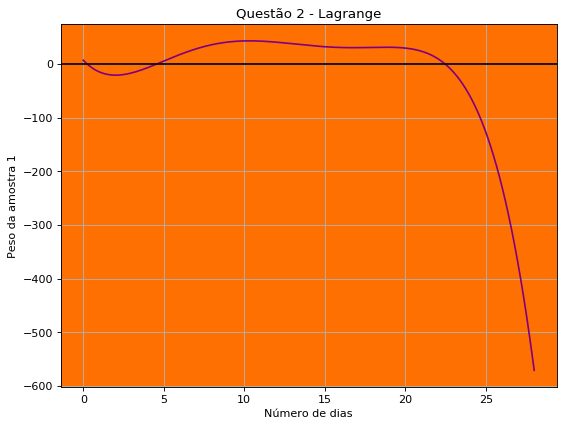

In [0]:
#obs: meu gráfico ficou zoado por algum motivo 
# tem essa cópia enquanto eu não arrumar aqui : https://colab.research.google.com/drive/1YLYE7zW2mTtDoOC04ga0QwF6a3eptIxG

#questao 2


z = [0,6, 10, 13, 17, 20, 28]
y = [6.67,17.33, 42.67, 37.33, 30.10, 29.31, 28.74]
n = len(x)
pontos = [(0,  6.67 ),
          (6,  17.33),
          (10, 42.67),
          (13, 37.33),
          (17, 30.10),
          (20, 29.31),
          (28, 28.74)]
plot_lagrange(lambda x: lagrange(n,z, y, x),
     pontos,
     "Número de dias",
     "Peso da amostra 1")

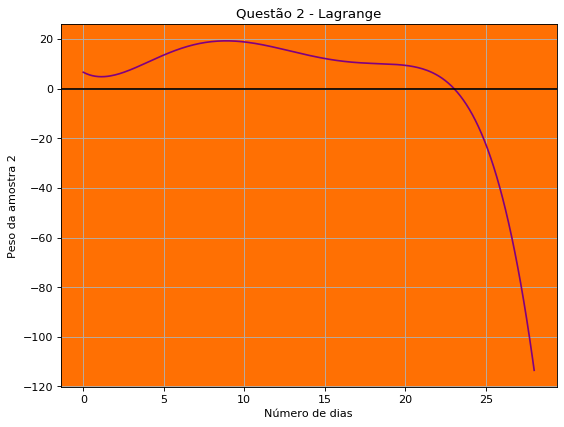

In [0]:
#questao 2


z = [0,6, 10, 13, 17, 20, 28]
y = [6.67,16.11, 18.89, 15, 10.56,  9.44, 8.89]
n = len(x)
pontos = [(0,  6.67),
          (6,  16.11),
          (10, 18.89),
          (13, 15),
          (17, 10.56),
          (20, 9.44),
          (28, 8.89)]
plot_lagrange(lambda x: lagrange(n,z, y, x),
     pontos,
     "Número de dias",
     "Peso da amostra 2")


##Newton


In [0]:
def newton(x, y, z):
    r = 0
    n = len(x)
    dely = [0] * n
    for i in range(n):
        dely[i] = y[i]
    
    for k in range(1,n):
        for i in range(n,k,-1):
            dely[i-1] =(dely[i-1] - dely[i-1-1])/(x[i-1]-x[i-k-1])
            #print(dely[i] )
            #dely[i] = (dely[k + 1] - dely[k]) / (x[k+1] - x[i])
    
    r = dely[n-1]
    
    #s = c[n-1]
        
    for i in range(n-1, 0, -1):
        r = r * (z -x[i-1]) + dely[i-1]
    
    return r
    
    

###Lista 8 - Newton


In [0]:
#questao 1

x = [1960, 1970, 1980, 1990, 2000, 2010]
y = [179.323, 203.302, 226.542, 249.633, 281.422, 308.746]
z = [1950, 1975, 2014, 2020]

n = 6

for i in range(4):
    print('A população aproximada do ano de %d é %.3f habitantes.' %(z[i],newton(x, y, z[i])))
    

A população aproximada do ano de 1950 é 192.539 habitantes.
A população aproximada do ano de 1975 é 215.526 habitantes.
A população aproximada do ano de 2014 é 306.215 habitantes.
A população aproximada do ano de 2020 é 266.165 habitantes.


In [0]:
#questao 2

x = [0.25,0.5,1, 1.25]
y = [25.2,  49.2,   60 + 36.4, 60 + 59.4]
print('O tempo aproximado de 3/4 de milha é %.3f segundos.' %(newton(x, y, 0.75)))

O tempo aproximado de 3/4 de milha é 72.967 segundos.


##Splines Naturais


In [0]:
def cubic_spline(x, y, aprox = None):
    def h(i):
        return x[i] - x[i-1]
    n = len(x) -1
    s = [[0.0] * n for i in range(n-1)]
    g = [0] * n
    
    A = np.zeros((n-1, n-1))
    for i in range(1, n):
        if i - 1 >= 1:
            A[i-1, i-1-1] = h(i)
        A[i-1, i-1] = 2 * (h(i) + h(i+1))
        if i + 1 < n:
            A[i-1, i+1-1] = h(i+1)
    
    b =  [0] * (n-1)
    n2 = len(y)
    for i in range(len(b)):
        
        b[i] = (6/h(1)) * (y[i+2] - 2*y[i+1] +y[i])
        #print(y[i])
    
    g = np.linalg.solve(A, b)
    g = np.concatenate((np.zeros(1), g, np.zeros(1)))
    #print(g)
    def testa_intervalo(k):
        if k == None:
            return None, None
        x0 = 0
        k1 = 0
        for i in range(n, 0, -1):
            if(k < x[i] ):
                x0 = x[i]
                k0 = i
        return x0, k0
    x0, k = testa_intervalo(aprox)
    #print(n)
    def calc_splines(x0 = None):
        
        s = [0]*n
        for i in range(1, n+1):
            a = (g[i] - g[i-1])/(6*h(i))
            
          #  print(a)
            b = g[i]/2
            d = y[i]
            c = ((y[i] - y[i-1])/h(i) + (2*h(i)*g[i] + g[i-1]*h(i))/6)
            print ('S%d f(x) = %.2f(x -%.2f)³ + %.2f(x - %.2f)² + %.2f(x -%.2f) + %.2f' %(i,a,x[i],b, x[i],c, x[i], d))
            if x0 != None:
                s[i-1] = a*(x0-x[i])**3 + b*(x0-x[i])**2 +c*(x0-x[i]) +d
        if x0 == None or k==None:
            return None
        else:
            print ("f(%.2f) = %f" %(aprox, s[k-1]))
            return s[k-1]
    
    return calc_splines(aprox)
    
    
    #testa_intervalo(0.25)

In [0]:
#lista 9

#x = [-0,5, -0,25, 0]
#y = [-0.0247500, 0.3349375, 1.1010000]

x = [0, 0.5, 1, 1.5, 2]
y = [3, 1.8616, -0.5571, -4.1987, -9.0536]
cubic_spline(x,y, 0.25)

S1 f(x) = -2.22(x -0.50)³ + -3.33(x - 0.50)² + -3.39(x -0.50) + 1.86
S2 f(x) = 0.85(x -1.00)³ + -2.06(x - 1.00)² + -6.08(x -1.00) + -0.56
S3 f(x) = -0.71(x -1.50)³ + -3.13(x - 1.50)² + -8.67(x -1.50) + -4.20
S4 f(x) = 2.08(x -2.00)³ + 0.00(x - 2.00)² + -10.23(x -2.00) + -9.05
f(0.25) = 2.534770


2.5347700892857143

In [0]:
#f(0.25)

cubic_spline(x,y,0.25)

S1 f(x) = -2.22(x -0.50)³ + -3.33(x - 0.50)² + -3.39(x -0.50) + 1.86
S2 f(x) = 0.85(x -1.00)³ + -2.06(x - 1.00)² + -6.08(x -1.00) + -0.56
S3 f(x) = -0.71(x -1.50)³ + -3.13(x - 1.50)² + -8.67(x -1.50) + -4.20
S4 f(x) = 2.08(x -2.00)³ + 0.00(x - 2.00)² + -10.23(x -2.00) + -9.05
f(0.25) = 2.534770


2.5347700892857143

In [0]:
#f(0.25)

cubic_spline(x,y,1.3)

S1 f(x) = -2.22(x -0.50)³ + -3.33(x - 0.50)² + -3.39(x -0.50) + 1.86
S2 f(x) = 0.85(x -1.00)³ + -2.06(x - 1.00)² + -6.08(x -1.00) + -0.56
S3 f(x) = -0.71(x -1.50)³ + -3.13(x - 1.50)² + -8.67(x -1.50) + -4.20
S4 f(x) = 2.08(x -2.00)³ + 0.00(x - 2.00)² + -10.23(x -2.00) + -9.05
f(1.30) = -2.584475


-2.584474628571429

### Lista 9


In [0]:
print("Questão 1 e 2 \n")
print("Letra a) :\n")
x = [8.3,8.6]
y = [17.56492,18.50515]
resul_aprox = cubic_spline(x,y, 8.4)
resul_correto = 17.8771463291
#https://www.google.com/search?q=8%2C4+ln+8%2C4&oq=8%2C4+ln+8%2C4&aqs=chrome..69i57j0l4.2124j0j1&sourceid=chrome&ie=UTF-8
print("O erro absoluto foi de ", abs(resul_aprox-resul_correto))
 

Questão 1 e 2 

Letra a) :

S1 f(x) = 0.00(x -8.60)³ + 0.00(x - 8.60)² + 3.13(x -8.60) + 18.51
f(8.40) = 17.878330
O erro absoluto foi de  0.0011836709000014878


In [0]:
print("Letra b) :\n")
x = [0.8, 1]
y = [ 0.22363362 ,0.65809197]
resul_aprox = cubic_spline(x,y, 0.9)
resul_correto = 0.44359243877
#https://www.google.com/search?sxsrf=ACYBGNSADJvRuGLsWeQuwVi9-3INEM263w%3A1572395905556&ei=gdu4XYfWIanX5OUPsbCWoAs&q=sen+%28e%5E0.9++-+2%29&oq=sen+%28e%5E0.9++-+2%29&gs_l=psy-ab.3...298462.304408..304930...0.0..0.161.999.0j7......0....2j1..gws-wiz.......0i13i30j0i13i10i30j0i7i30j0i8i7i30j0i8i30.qukWdrY4l-0&ved=0ahUKEwjHmpab38LlAhWpK7kGHTGYBbQQ4dUDCAo&uact=5

print("O erro absoluto foi de ", abs(resul_aprox-resul_correto))

Letra b) :

S1 f(x) = 0.00(x -1.00)³ + 0.00(x - 1.00)² + 2.17(x -1.00) + 0.66
f(0.90) = 0.440863
O erro absoluto foi de  0.0027296437699999565


In [0]:
print("Letra c) :\n")
x = [-0.5, -0.25, 0]
y = [-0.0247500, 0.3349375, 1.1010000]
resul_aprox = cubic_spline(x,y, -0.33)
resul_correto = 0.1801119
#https://www.google.com/search?sxsrf=ACYBGNS7tjBSKdeYcKHomHeAnXkPbTMyzA%3A1572396396157&ei=bN24XayfCYWw5OUProO2mAk&q=-0.33%5E3+%2B+4.001*0.33%5E2+%2B+4.002*-0.33+%2B+1.101&oq=-0.33%5E3+%2B+4.001*0.33%5E2+%2B+4.002*-0.33+%2B+1.101&gs_l=psy-ab.3...31046.50684..59840...1.0..0.118.232.0j2......0....1..gws-wiz.pk1miY7DOA4&ved=0ahUKEwishY6F4cLlAhUFGLkGHa6BDZMQ4dUDCAo&uact=5
print("O erro absoluto foi de ", abs(resul_aprox-resul_correto))

Letra c) :

S1 f(x) = 6.50(x --0.25)³ + 4.88(x - -0.25)² + 2.25(x --0.25) + 0.33
S2 f(x) = -6.50(x -0.00)³ + 0.00(x - 0.00)² + 3.47(x -0.00) + 1.10
f(-0.33) = 0.182698
O erro absoluto foi de  0.0025861759999999956


In [0]:
print("Letra d) :\n")
x = [0.1,0.2,0.3,0.4]
y = [-0.62049958, -0.28398668, 0.00660095, 0.24842440]
resul_aprox = cubic_spline(x,y, 0.25)
resul_correto = -0.13277189457
#https://wwwhttps://www.google.com/search?sxsrf=ACYBGNQdj6h1fleY8-x9xXRrKmlXK_n9eg%3A1572396604093&ei=PN64XeWvBd7B5OUP1rO-uAc&q=0.25+cos+0.25+-2+*0.25%5E2+%2B+3*0.25+-+1&oq=0.25+cos+0.25+-2+*0.25%5E2+%2B+3*0.25+-+1&gs_l=psy-ab.3...20112.25983..26759...0.0..0.161.772.0j6......0....1..gws-wiz.FZbYEeJnSKo&ved=0ahUKEwjlvaHo4cLlAhXeILkGHdaZD3cQ4dUDCAo&uact=5.google.com/search?sxsrf=ACYBGNS7tjBSKdeYcKHomHeAnXkPbTMyzA%3A1572396396157&ei=bN24XayfCYWw5OUProO2mAk&q=-0.33%5E3+%2B+4.001*0.33%5E2+%2B+4.002*-0.33+%2B+1.101&oq=-0.33%5E3+%2B+4.001*0.33%5E2+%2B+4.002*-0.33+%2B+1.101&gs_l=psy-ab.3...31046.50684..59840...1.0..0.118.232.0j2......0....1..gws-wiz.pk1miY7DOA4&ved=0ahUKEwishY6F4cLlAhUFGLkGHa6BDZMQ4dUDCAo&uact=5
print("O erro absoluto foi de ", abs(resul_aprox-resul_correto))

Letra d) :

S1 f(x) = -9.00(x -0.20)³ + -2.70(x - 0.20)² + 3.19(x -0.20) + -0.28
S2 f(x) = -0.95(x -0.30)³ + -2.98(x - 0.30)² + 2.62(x -0.30) + 0.01
S3 f(x) = 9.94(x -0.40)³ + 0.00(x - 0.40)² + 2.32(x -0.40) + 0.25
f(0.25) = -0.131591
O erro absoluto foi de  0.0011807383199999855


##Método dos Mínimos Quadrados

In [0]:
def mmq(x, y, n):
	xs = np.array([]); xy = np.array([])	
	for index in range(0, (n + 1)):
		for exp in range(0, (n + 1)):
			tx = np.sum(x**(index + exp))	
			xs = np.append(xs, tx)
		ty = np.sum(y * (x**index))	
		xy = np.append(xy, ty)
	return xs, xy

def find_error(y, fn):
	return np.sum((y - fn)**2)	

def fn(x, a):
	px = 0
	for index in range(0, np.size(a)):
		px += (a[index] * (x**index))	# avalia f(x)
	return px

def plot(x, y, fn):
    pl.figure(figsize=(8, 6), dpi=80)
    ax = pl.subplot(1, 1, 1)
    ax = pl.gca()
    ax.set_facecolor('#ff7003')
    pl.plot(x, y, color='#af30de', linewidth=3.0, linestyle='-', label='y')
    pl.subplot(1, 1, 1)
    pl.plot(x, fn, color='black', linewidth=3.0, linestyle='--', label='f(x)')
    pl.legend(loc='upper left')
    pl.grid()
    
    pl.show()


[[5.         2.5        1.875      1.5625    ]
 [2.5        1.875      1.5625     1.3828125 ]
 [1.875      1.5625     1.3828125  1.26953125]
 [1.5625     1.3828125  1.26953125 1.19384766]] 

 [[8.768     ]
 [5.4514    ]
 [4.4015375 ]
 [3.83755938]]

 [[0.99990714]
 [1.01410952]
 [0.42525714]
 [0.27893333]]

E = 6.035714285715225e-07


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


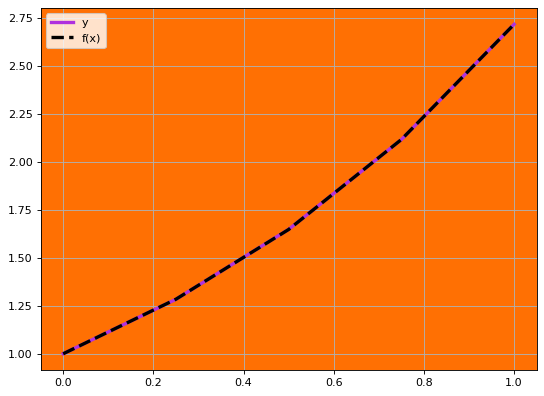

In [0]:
n = 3	
x = np.array([0, 0.25, 0.5, 0.75, 1.0], float)	
y = np.array([1, 1.284, 1.6487, 2.117, 2.7183], float)	
xs, xy = mmq(x, y, n)	
xs = np.reshape(xs, ((n + 1), (n + 1)))	
xy = np.reshape(xy, ((n + 1), 1))
print(xs, '\n\n', xy)
a = np.linalg.solve(xs, xy)	
print('\n', a)	
error = find_error(y, np.array(fn(x, a)))	# determina erro do f(x)
print("\nE =",error)
plot(x, y, fn(x, a))	

###Lista 10 

[[6.000000e+00 3.500000e+01 2.870000e+02 2.765000e+03]
 [3.500000e+01 2.870000e+02 2.765000e+03 2.893100e+04]
 [2.870000e+02 2.765000e+03 2.893100e+04 3.169250e+05]
 [2.765000e+03 2.893100e+04 3.169250e+05 3.568907e+06]] 

 [[   66. ]
 [  380.5]
 [ 3413.5]
 [35360.5]]

 [[ 28.6648859 ]
 [-10.47125952]
 [  1.44247008]
 [ -0.05550964]]

E = 3.9086637598350285


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


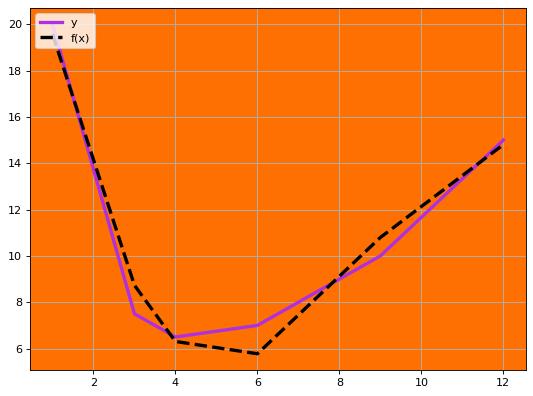

In [0]:
#questão 1
# a = 15
n = 3	# this is the degree of the approximating polynomial P(x)
x = np.array([1, 3, 4, 6, 9, 12], float)	
y = np.array([20, 7.5, 6.5, 7, 10, 15], float)	
xs, xy = mmq(x, y, n)	
xs = np.reshape(xs, ((n + 1), (n + 1)))	
xy = np.reshape(xy, ((n + 1), 1))
print(xs, '\n\n', xy)
a = np.linalg.solve(xs, xy)
print('\n', a)	
error = find_error(y, np.array(fn(x, a)))	
print("\nE =",error)
plot(x, y, fn(x, a))


[[6.000000e+00 3.500000e+01 2.870000e+02 2.765000e+03]
 [3.500000e+01 2.870000e+02 2.765000e+03 2.893100e+04]
 [2.870000e+02 2.765000e+03 2.893100e+04 3.169250e+05]
 [2.765000e+03 2.893100e+04 3.169250e+05 3.568907e+06]] 

 [[   71. ]
 [  440.5]
 [ 4133.5]
 [44000.5]]

 [[27.85104024]
 [-9.52230091]
 [ 1.18929349]
 [-0.03766833]]

E = 6.130546787701449


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


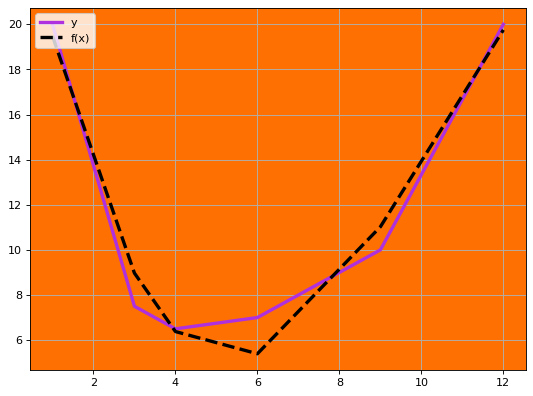

In [0]:
#questão 1
# a = 20
n = 3	# this is the degree of the approximating polynomial P(x)
x = np.array([1, 3, 4, 6, 9, 12], float)	
y = np.array([20, 7.5, 6.5, 7, 10, 20], float)	
xs, xy = mmq(x, y, n)	
xs = np.reshape(xs, ((n + 1), (n + 1)))	
xy = np.reshape(xy, ((n + 1), 1))
print(xs, '\n\n', xy)
a = np.linalg.solve(xs, xy)
print('\n', a)	
error = find_error(y, np.array(fn(x, a)))	
print("\nE =",error)
plot(x, y, fn(x, a))	


[[6.000000e+00 3.500000e+01 2.870000e+02 2.765000e+03]
 [3.500000e+01 2.870000e+02 2.765000e+03 2.893100e+04]
 [2.870000e+02 2.765000e+03 2.893100e+04 3.169250e+05]
 [2.765000e+03 2.893100e+04 3.169250e+05 3.568907e+06]] 

 [[   76. ]
 [  500.5]
 [ 4853.5]
 [52640.5]]

 [[ 2.70371946e+01]
 [-8.57334230e+00]
 [ 9.36116903e-01]
 [-1.98270301e-02]]

E = 8.89242083011738


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


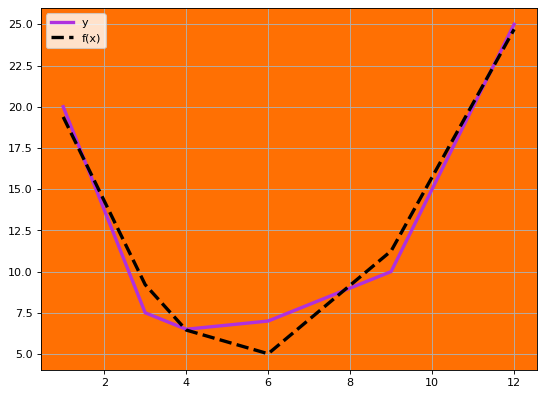

In [0]:
#questão 1
# a = 25
n = 3	# this is the degree of the approximating polynomial P(x)
x = np.array([1, 3, 4, 6, 9, 12], float)	
y = np.array([20, 7.5, 6.5, 7, 10, 25], float)	
xs, xy = mmq(x, y, n)	
xs = np.reshape(xs, ((n + 1), (n + 1)))	
xy = np.reshape(xy, ((n + 1), 1))
print(xs, '\n\n', xy)
a = np.linalg.solve(xs, xy)
print('\n', a)	
error = find_error(y, np.array(fn(x, a)))	
print("\nE =",error)
plot(x, y, fn(x, a))	


[[1.00000000e+01 2.66000000e+02 7.19000000e+03 1.97414000e+05]
 [2.66000000e+02 7.19000000e+03 1.97414000e+05 5.50299800e+06]
 [7.19000000e+03 1.97414000e+05 5.50299800e+06 1.55635886e+08]
 [1.97414000e+05 5.50299800e+06 1.55635886e+08 4.46256347e+09]] 

 [[3.06561905e+01]
 [8.25043333e+02]
 [2.25222967e+04]
 [6.23460443e+05]]

 [[-8.01135030e+01]
 [ 8.71290486e+00]
 [-3.01602484e-01]
 [ 3.45811536e-03]]

E = 0.9861905882149969


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


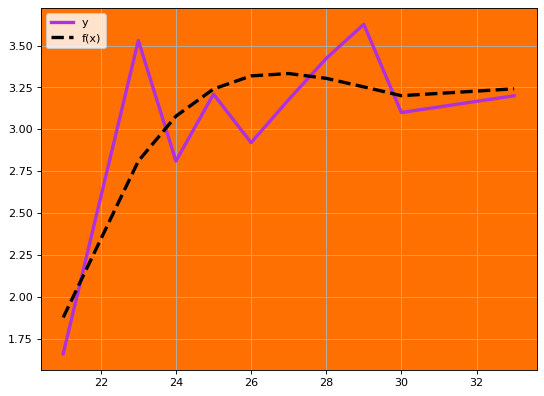

In [0]:
pontos = [(28, 3.84), (25, 3.21), (28, 3.23), (27, 3.63), (28, 3.75),
           (33, 3.20), (28, 3.41), (29, 3.38), (23, 3.53), (27, 2.03),
           (29, 3.75), (28, 3.65), (27, 3.87), (29, 3.75), (21, 1.66),
           (28, 3.12), (28, 2.96), (26, 2.92), (30, 3.10), (24, 2.81)]

array = np.array(pontos, "float64")
media = []
for nota_ACT in range(int(array[:, 0].min()),
                  int(array[:, 0].max() + 1)):
    notas_faculdade = []
    for nota in pontos:
        if nota[0] == nota_ACT:
            notas_faculdade.append(nota[1])
    if len(notas_faculdade) > 0:
        media.append((nota_ACT,
                                sum(notas_faculdade) / len(notas_faculdade)))
        
m = np.array(media, "float64")

y = []
x = []
for i in m:
    x.append(i[0])
    y.append(i[1])

n = 3	# this is the degree of the approximating polynomial P(x)
x = np.array(x, float)	
y = np.array(y, float)	
xs, xy = mmq(x, y, n)	
xs = np.reshape(xs, ((n + 1), (n + 1)))	
xy = np.reshape(xy, ((n + 1), 1))
print(xs, '\n\n', xy)
a = np.linalg.solve(xs, xy)
print('\n', a)	
error = find_error(y, np.array(fn(x, a)))	
print("\nE =",error)
plot(x, y, fn(x, a))


[[2.10000000e+01 9.06000000e+02 5.86400000e+04 4.95313800e+06]
 [9.06000000e+02 5.86400000e+04 4.95313800e+06 4.92044072e+08]
 [5.86400000e+04 4.95313800e+06 4.92044072e+08 5.39070121e+10]
 [4.95313800e+06 4.92044072e+08 5.39070121e+10 6.27054526e+12]] 

 [[3.44000000e+02]
 [1.78130000e+04]
 [1.36664100e+06]
 [1.30324763e+08]]

 [[ 1.63836548e+01]
 [-2.64105039e-01]
 [ 6.08586092e-03]
 [-2.37531177e-05]]

E = 176.9581874559454


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


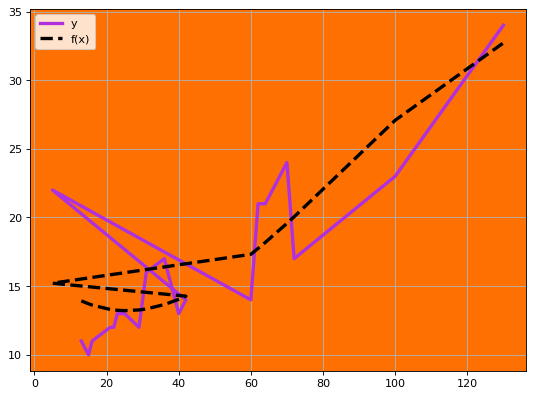

In [0]:
#questão 2
#alunos de cc
x = [13, 15, 16, 21, 22, 23,25, 29, 30, 31, 36 ,40,42, 5,60, 62, 64, 70,72, 100,130]
y = [11, 10,  11,  12,  12,  13, 13,  12,  14,  16,  17,  13,14,  22,  14,  21,  21,  24, 17,  23,  34]

n = 3	# this is the degree of the approximating polynomial P(x)
x = np.array(x, float)	
y = np.array(y, float)	
xs, xy = mmq(x, y, n)	
xs = np.reshape(xs, ((n + 1), (n + 1)))	
xy = np.reshape(xy, ((n + 1), 1))
print(xs, '\n\n', xy)
a = np.linalg.solve(xs, xy)
print('\n', a)	
error = find_error(y, np.array(fn(x, a)))	
print("\nE =",error)
plot(x, y, fn(x, a))	
